In [ ]:
! pip install xgboost

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [30]:
import pandas as pd

# Load the dataset
data_moods = pd.read_csv('songs_with_moods.csv')

# Display the first few rows of the dataset
data_moods.head()

,playlist_id,track_id,title,artists,artist_ids,preview_url,album,cover_url,danceability,energy,...,liveness,loudness,speechiness,key,mode,time_signature,track_popularity,release_date,cluster,mood
0,37i9dQZF1E36jQAgl791vy,03PtknZU5nhXUqosFYNKEf,Mathakayan obe,"Chamara Weerasinghe, Aradhana Ekanayaka","0Dnie0m84vyBv4S33KKOgy, 4u7oLWAsRHOXbfwr4FDQQq",https://p.scdn.co/mp3-preview/5dd061767f92a997...,Mathakayan obe,https://i.scdn.co/image/ab67616d0000b2730b450a...,0.791,0.863,...,0.3060,-11.406,0.0370,10,0,4,39,2003-04-02,3,Calm
1,37i9dQZF1E36jQAgl791vy,4wvEqjikLbOM7TrLJSQiKN,Pem Mal,"Mohideen Baig, Latha Walpola","5zkcNzmwkI9PB0VOkXkWVi, 2sn075WC3sXXD17t57FkTn",https://p.scdn.co/mp3-preview/51825b656522449c...,Pem Mal Mala,https://i.scdn.co/image/ab67616d0000b273a27701...,0.495,0.581,...,0.6020,-7.978,0.1830,0,1,3,4,2014-02-21,2,Relaxed
2,37i9dQZF1E36jQAgl791vy,2K7kHKYCiqQ2Fg9Wr5g8cG,Pura Poya Handata,"Rohana Weerasinghe, Sunil Edirisinghe","7xtH99LIfTdFERRQE7kT8z, 3Cux1TIhKof6hpTZAcAdHv",https://p.scdn.co/mp3-preview/78f7e64075ea757b...,"Top Sinhala Songs, Vol. 42",https://i.scdn.co/image/ab67616d0000b273b37b48...,0.527,0.278,...,0.0620,-13.863,0.0417,5,0,3,0,2020-08-21,9,Sad
3,37i9dQZF1E36jQAgl791vy,2VHERYGLjjU5fqR0SFTUYm,Ahasin Eha,"Udara Samaraweera, Uresha Ravihari, Kasun Kalhara","5bJVhEZyYJ17uQ8NSgbkcM, 5T4mymgJStVIyosEmFreK1...",https://p.scdn.co/mp3-preview/4e609345445808bb...,Adaraneeya Kathawak,https://i.scdn.co/image/ab67616d0000b273da1fa7...,0.604,0.494,...,0.1680,-8.101,0.0330,6,1,4,42,2016,4,Neutral
4,37i9dQZF1E36jQAgl791vy,656jjvRI6vvIeTojaEIXOp,Kavi Seepada,Chandana Liyanaarachchi,7zjVTNpa6yndlQ5ejYOGbm,https://p.scdn.co/mp3-preview/156b3d94d2bcd584...,Kavi Seepada,https://i.scdn.co/image/ab67616d0000b273b0f731...,0.716,0.491,...,0.0779,-12.690,0.0358,7,1,3,15,2000-12-01,3,Calm


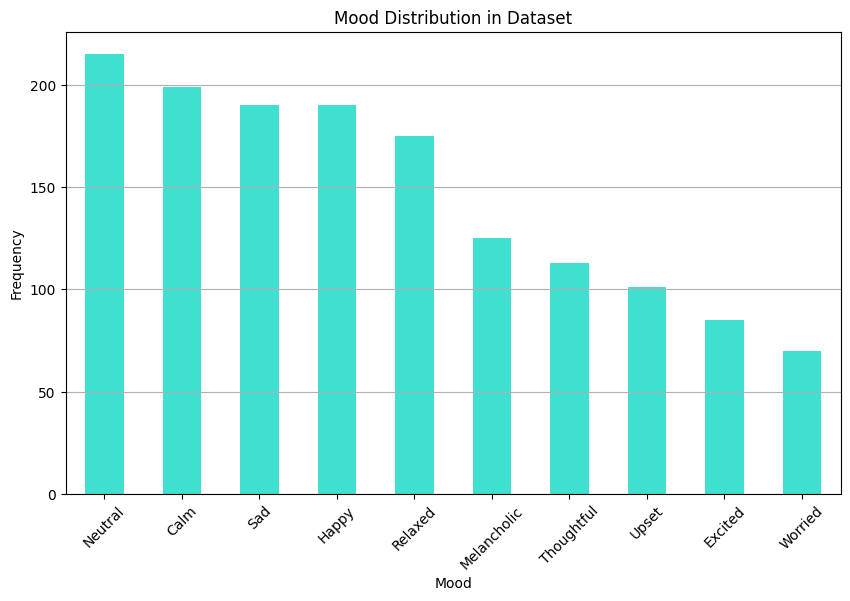

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'songs_with_moods.csv'  
data = pd.read_csv(file_path)

# Count the frequency of each mood in the dataset
mood_counts = data['mood'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
mood_counts.plot(kind='bar', color='turquoise')
plt.title('Mood Distribution in Dataset')
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

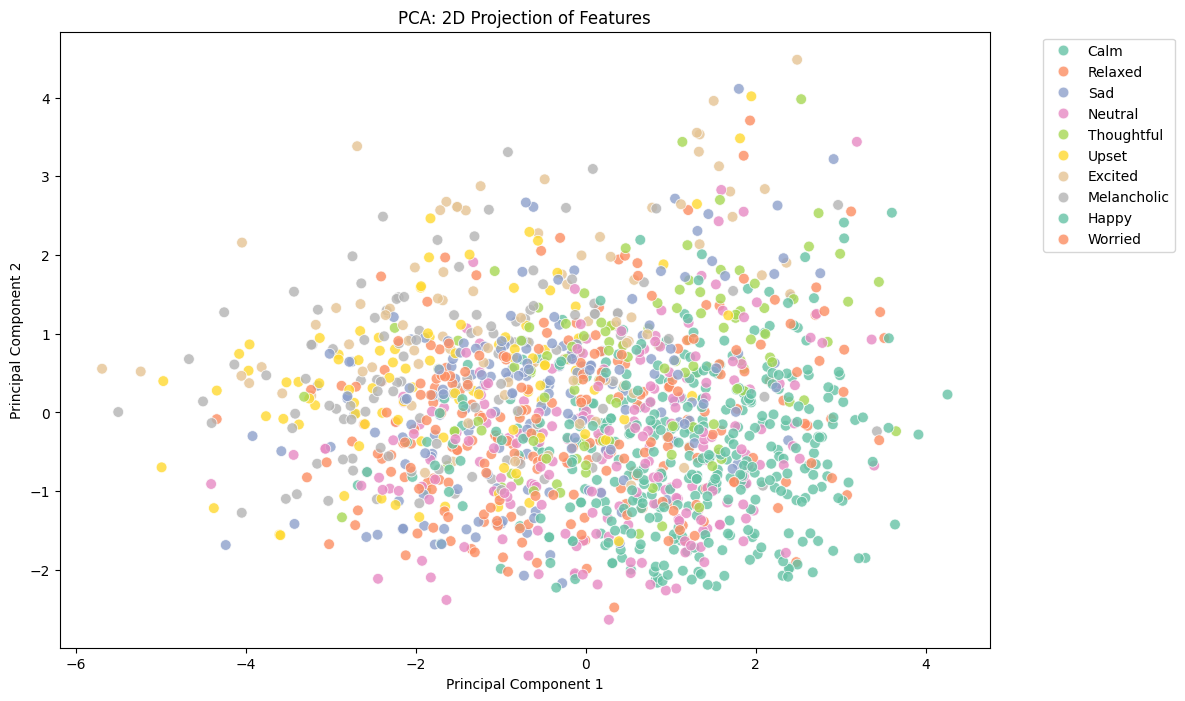

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your data
file_path = 'songs_with_moods.csv'
data = pd.read_csv(file_path)

# Extracting features and target variable 
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 
            'instrumentalness', 'liveness', 'loudness', 'speechiness', 'key']
target = data['mood']

# Extract features from the DataFrame
X = data[features]

# Handle potential non-numeric data (e.g., 'key' could be categorical)
# Convert categorical columns to numerical using one-hot encoding or similar method
# Here, we are just ensuring numerical values are used
X = pd.get_dummies(X, columns=['key'], drop_first=True)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=target, palette='Set2', s=60, alpha=0.8)
plt.title("PCA: 2D Projection of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


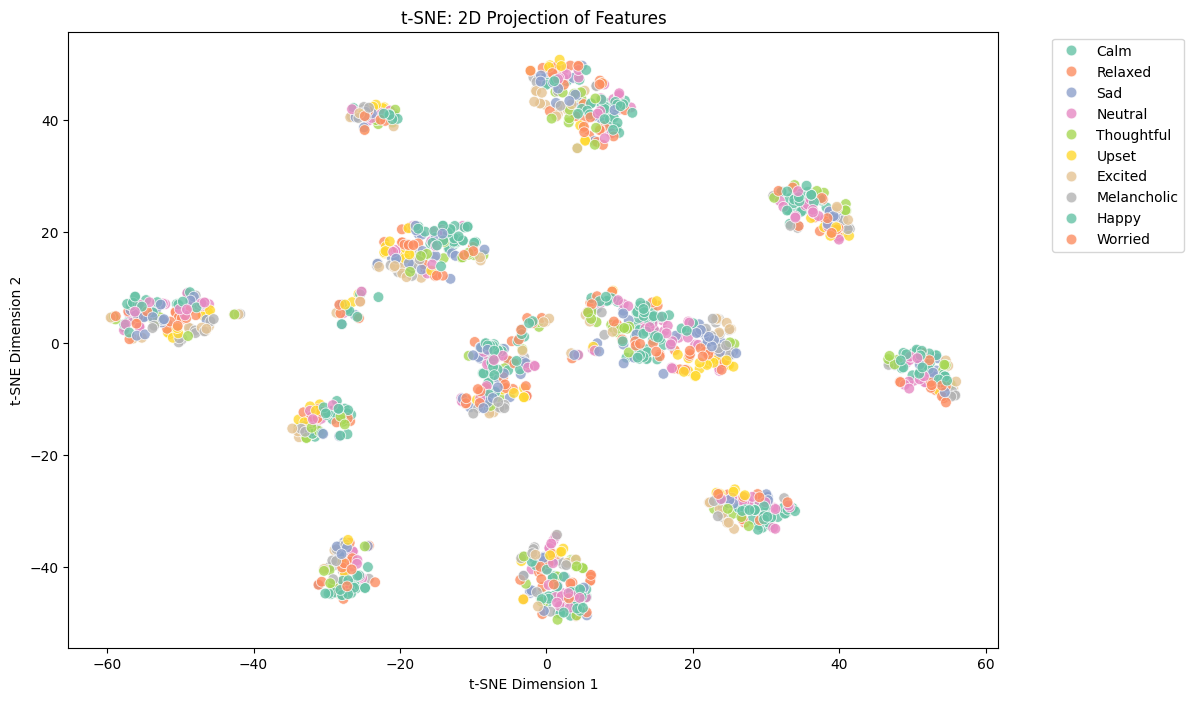

In [34]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_features)

# Plot t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=target, palette='Set2', s=60, alpha=0.8)
plt.title("t-SNE: 2D Projection of Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

# Load the dataset
data = pd.read_csv('songs_with_moods.csv')

# Extracting features and target
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 
            'instrumentalness', 'liveness', 'loudness', 'speechiness', 'key']
target = 'mood'

# Select the features and target from the DataFrame
X = data[features]
y = data[target]

# Handle categorical data in features (e.g., 'key' could be categorical)
X = pd.get_dummies(X, columns=['key'], drop_first=True)

# Standardize all the numerical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Label encode the 'mood' column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training, evaluation, and testing sets (70-10-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGB Classifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    "SVM Linear": SVC(kernel="linear", random_state=42),
    "SVM Polynomial": SVC(kernel="poly", random_state=42),
    "SVM RBF": SVC(kernel="rbf", random_state=42),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Record the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

results_df = pd.DataFrame(results).T
print(results_df)


C:\Users\Nipuna Muhandiram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:38:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                      Accuracy  Precision    Recall  F1 Score
Logistic Regression   0.891525   0.895358  0.891525  0.889180
SGD Classifier        0.535593   0.609524  0.535593  0.524301
Gaussian Naive Bayes  0.674576   0.690380  0.674576  0.675868
Decision Tree         0.959322   0.959750  0.959322  0.959228
Random Forest         0.915254   0.920176  0.915254  0.912992
XGB Classifier        0.952542   0.954690  0.952542  0.951731
SVM Linear            0.905085   0.908522  0.905085  0.903950
SVM Polynomial        0.698305   0.759759  0.698305  0.704246
SVM RBF               0.776271   0.795045  0.776271  0.774927
KNN                   0.600000   0.627089  0.600000  0.595236


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':  ['sqrt']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters from grid search
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_rf, best_score_rf

# Initialize the Random Forest model with the best hyperparameters
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)

# Train the model
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)

# Calculate the metrics
accuracy_tuned_rf = accuracy_score(y_test, y_pred_rf)
precision_tuned_rf = precision_score(y_test, y_pred_rf, average="weighted")
recall_tuned_rf = recall_score(y_test, y_pred_rf, average="weighted")
f1_tuned_rf = f1_score(y_test, y_pred_rf, average="weighted")

accuracy_tuned_rf, precision_tuned_rf, recall_tuned_rf, f1_tuned_rf

(0.9152542372881356,
 0.9201764542915533,
 0.9152542372881356,
 0.9129922911698396)

In [37]:
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)


                  Importance
danceability        0.318341
tempo               0.271266
speechiness         0.065950
valence             0.060716
acousticness        0.057705
energy              0.052090
liveness            0.045130
loudness            0.044211
instrumentalness    0.036672
key_7               0.007077
key_4               0.005273
key_2               0.005127
key_9               0.005122
key_10              0.004358
key_5               0.004270
key_1               0.003951
key_11              0.003705
key_6               0.003577
key_8               0.003184
key_3               0.002275


In [38]:
import joblib
joblib.dump(best_rf, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']

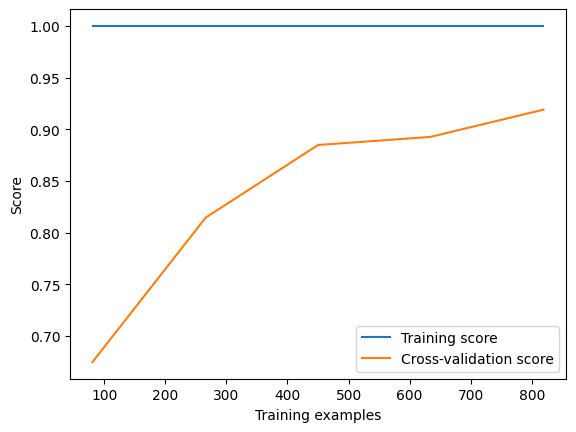

In [39]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_rf, X_train, y_train, cv=5, n_jobs=-1)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()


In [40]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)

# Calculate and print metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.95      0.95      0.95        22
           2       0.91      0.88      0.89        33
           3       0.92      0.79      0.85        29
           4       0.94      0.96      0.95        47
           5       0.97      0.93      0.95        30
           6       0.79      0.97      0.87        31
           7       0.88      0.96      0.92        24
           8       0.96      0.96      0.96        23
           9       1.00      0.54      0.70        13

    accuracy                           0.92       295
   macro avg       0.92      0.89      0.90       295
weighted avg       0.92      0.92      0.91       295



In [41]:
def get_tracks_by_mood(mood_input, track_data, label_encoder):
    try:
        # Encode the mood input
        mood_encoded = label_encoder.transform([mood_input])[0]
        print(f"Encoded mood input: {mood_encoded}")
        
        # Check if the encoded mood is present in the dataset
        if mood_encoded not in track_data['mood'].map(lambda x: label_encoder.transform([x])[0]).values:
            print("The mood input does not match any entries in the dataset.")
            return pd.DataFrame(columns=['track_id', 'title','track_popularity'])
        
        # Filter tracks by the input mood
        filtered_tracks = track_data[track_data['mood'] == mood_input]
        
        # Check if filtering worked
        if filtered_tracks.empty:
            print("No tracks found for the specified mood.")
        
        # Select relevant columns
        result = filtered_tracks[['track_id', 'title','track_popularity']]
        
        return result
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame(columns=['track_id', 'title','track_popularity'])

# Test the function with 'Sad'
# tracks = get_tracks_by_mood('Happy', track_data, label_encoder)
# print(tracks)


In [42]:
import pandas as pd
import numpy as np

def get_random_song_for_mood(track_data, mood_input, label_encoder):
    # Get tracks by the specified mood
    filtered_tracks = get_tracks_by_mood(mood_input, track_data, label_encoder)
    
    if filtered_tracks.empty:
        print("No tracks found for the specified mood.")
        return pd.DataFrame(columns=['track_id', 'title'])
    
    # Randomly select one song from the filtered tracks
    random_song = filtered_tracks.sample(n=10, random_state=np.random.randint(0, 10000))
    
    return random_song[['track_id', 'title']]

# Example usage
# mood_input = 'Happy'
# random_song = get_random_song_for_mood(track_data, mood_input, label_encoder)
# print(random_song)


In [50]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the best-trained Random Forest model
with open('best_random_forest_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the dataset
track_data = pd.read_csv('songs_with_moods.csv')

# Encode mood labels
mood_labels = ['Calm', 'Excited', 'Happy', 'Melancholic', 'Neutral', 'Relaxed', 'Sad', 'Thoughtful', 'Upset', 'Worried']
label_encoder = LabelEncoder()
label_encoder.fit(mood_labels)

def get_tracks_by_mood(mood_input, track_data, label_encoder):
    try:
        # Encode the mood input
        mood_encoded = label_encoder.transform([mood_input])[0]
        print(f"Encoded mood input: {mood_encoded}")
        
        # Check if the encoded mood is present in the dataset
        if mood_encoded not in track_data['mood'].map(lambda x: label_encoder.transform([x])[0]).values:
            print("The mood input does not match any entries in the dataset.")
            return pd.DataFrame(columns=['track_id', 'title', 'track_popularity'])
        
        # Filter tracks by the input mood
        filtered_tracks = track_data[track_data['mood'] == mood_input]
        
        # Check if filtering worked
        if filtered_tracks.empty:
            print("No tracks found for the specified mood.")
        
        # Select relevant columns
        result = filtered_tracks[['track_id', 'title', 'track_popularity']]
        
        return result
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame(columns=['track_id', 'title', 'track_popularity'])

def get_random_song_for_mood(track_data, mood_input, label_encoder):
    # Get tracks by the specified mood
    filtered_tracks = get_tracks_by_mood(mood_input, track_data, label_encoder)
    
    if filtered_tracks.empty:
        print("No tracks found for the specified mood.")
        return pd.DataFrame(columns=['track_id', 'title'])
    
    # Randomly select one song from the filtered tracks
    random_song = filtered_tracks.sample(n=10, random_state=np.random.randint(0, 1000))
    
    return random_song[['track_id', 'title']]

def predict_songs(mood_input):
    # Get random songs for the specified mood
    random_songs = get_random_song_for_mood(track_data, mood_input, label_encoder)
    return random_songs

if __name__ == "__main__":
    # Example usage
    mood_input = 'Happy'  # Change this to the desired mood
    recommendations = predict_songs(mood_input)
    print("Recommended songs:")
    print(recommendations)


Encoded mood input: 2
Recommended songs:
                    track_id                         title
826   4WB4IdbHkBGUqhHUIHXcAl                 Duwani - Live
291   1dtastVuwXTFMb8ewWb3mp                   Ran Ran Ran
290   7snlGLJ9C53U0reBazP0By                  Alavanthiyak
126   3wBCm0eVGdMpaxSIzg43yJ                   Paalu Yaame
177   19BNzTGIT1SXUHpjhixMUX                   Namal mitak
536   6ahGShWSkIHVoBd278gYnC                       Bonnona
1236  4GOlWuBwEPFyKNGpUDaB4A                        Nasuna
1197  0Z5GDJaTbmrbZP90Uwo37k                     Nil dasin
1206  5EqggGHTuqiUfruO2gMHhI               Dance Pe Chance
285   312ZJpHU8bzpRRGnnyqllV  Unmada Dethol - New York Mix
